In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
df_flare = pd.read_csv('allsky_flare_out.csv')
df_param = pd.read_csv('allsky_param_out.csv')
df_param['rot_per'] = np.exp(df_param['log_P'])

In [3]:
# Throw out cases where gp fit failed
mask = df_param['log_P'] > -15
print(len(df_param), len(df_param[mask]))

df_param = df_param[mask]

475898 475097


475097 84855


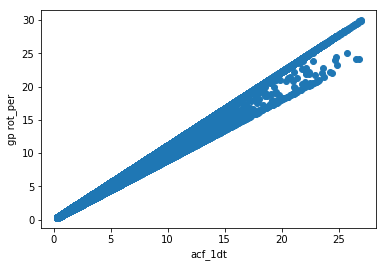

In [4]:
# Since we restrict rotation period to be within 10% of
# acf period, throw out cases where the gp fit hit the bounds
acf_1dt = df_param['acf_1dt']
rot_per = df_param['rot_per']

plt.scatter(acf_1dt, rot_per)
plt.xlabel('acf_1dt')
plt.ylabel('gp rot_per')

mask = (rot_per/acf_1dt > 0.9) & (rot_per/acf_1dt < 1.1)
print(len(df_param), len(df_param[mask]))
df_param = df_param[mask]

In [6]:
# This might be a few too many for tyler to MCMC still
# How many of these were flare stars?
len(df_param[np.isin(df_param['TIC'], df_flare['TIC'])])

10874